In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

## Data cleaning

In [71]:
data = load_iris()
df = pd.DataFrame(np.hstack((data['data'], data['target'].reshape(-1,1))), columns = ['sepallength(cm)','sepalwidth(cm)','petallength(cm)','petalwidth(cm)', 'species'])
df.tail()
#"Checking for missing val"

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [72]:
df.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepallength(cm)  150 non-null    float64
 1   sepalwidth(cm)   150 non-null    float64
 2   petallength(cm)  150 non-null    float64
 3   petalwidth(cm)   150 non-null    float64
 4   species          150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [74]:
df.isnull().sum()

sepallength(cm)    0
sepalwidth(cm)     0
petallength(cm)    0
petalwidth(cm)     0
species            0
dtype: int64

## Exploratory Data Analysis
### Checking for the distribution of each column

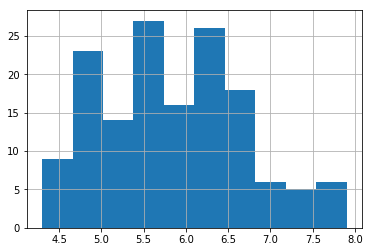

In [75]:
df['sepallength(cm)'].hist()

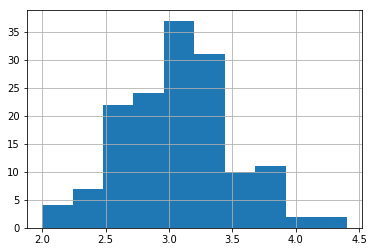

In [76]:
df['sepalwidth(cm)'].hist()

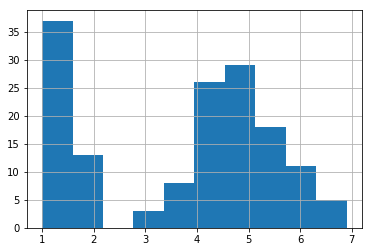

In [77]:
df['petallength(cm)'].hist()

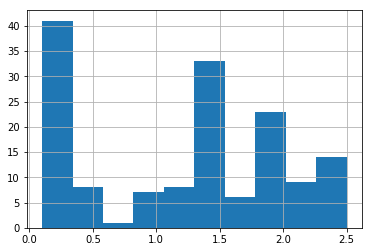

In [78]:
df['petalwidth(cm)'].hist()

In [79]:
df['species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: species, dtype: int64

### Checking for the correlation of each column using scatter plots

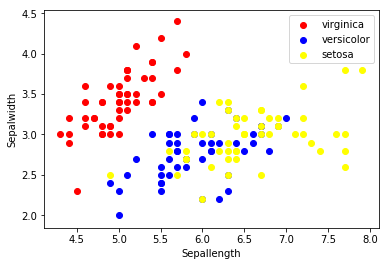

In [80]:
species = ['virginica', 'versicolor', 'setosa']
colors = ['red', 'blue', 'yellow']
for i in range(3):
    x = df[df['species'] == i]
    plt.scatter(x = x['sepallength(cm)'], y = x['sepalwidth(cm)'], color = colors[i], label = species[i])
plt.xlabel("Sepallength")
plt.ylabel("Sepalwidth")
plt.legend()

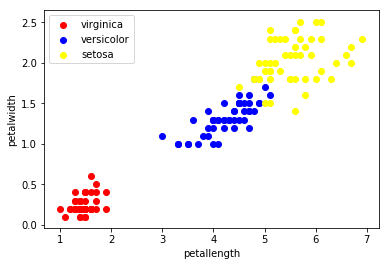

In [81]:
for i in range(3):
    x = df[df['species'] == i]
    plt.scatter(x = x['petallength(cm)'], y = x['petalwidth(cm)'], color = colors[i], label = species[i])
plt.xlabel("petallength")
plt.ylabel("petalwidth")
plt.legend()

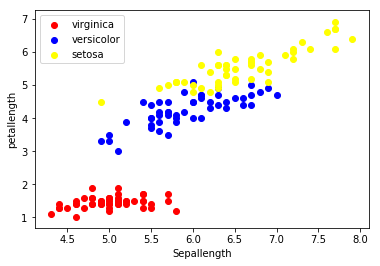

In [82]:
for i in range(3):
    x = df[df['species'] == i]
    plt.scatter(x = x['sepallength(cm)'], y = x['petallength(cm)'], color = colors[i], label = species[i])
plt.xlabel("Sepallength")
plt.ylabel("petallength")
plt.legend()

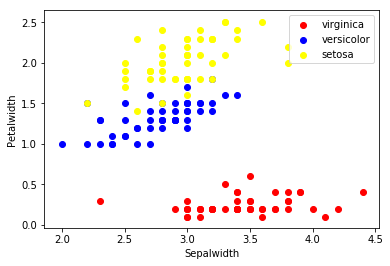

In [83]:
for i in range(3):
    x = df[df['species'] == i]
    plt.scatter(x = x['sepalwidth(cm)'], y = x['petalwidth(cm)'], color = colors[i], label = species[i])
plt.xlabel("Sepalwidth")
plt.ylabel("Petalwidth")
plt.legend()

In [84]:
corr = df.iloc[:,:4].corr()

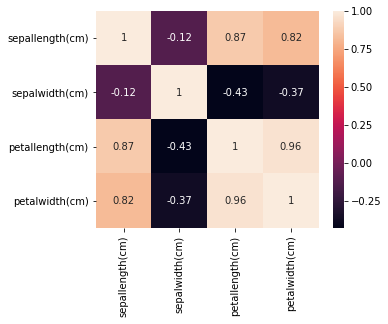

In [85]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(corr, annot = True)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:, :4]
y = df.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [87]:
clf.score(x_test, y_test)

0.9333333333333333